In [ ]:
'''This code will open a .csv file that contains the coral bleaching data.  The data format is: each row is a different report on 
a different location.  The column headings are ID #, Region, Subregion, Country, Location, Lat, Lon, Month, Year, Depth, Severity_Code, and 
Bleaching_Severity.
The severity_code works as follows:
-1 = severity unknown
0 = no bleaching
1 = low bleaching
2 = medium bleaching
3 = high bleaching
We want to read the file line by line and for each line, add it to a dictionary of dictionaries.
The outer dictionary keys will be ID #, and dictionary for each region will contain dictionaries with keys of the other columns'''

'''Outputs from this data:
1. tally of each type of bleaching severity for each broad region
2. tally of each type of bleaching severity for subregions
3. bar plots showing bleaching severity by region and subregion
4. dictionary of severity of coral bleaching for each year using the coral bleaching index
5. plot of coral bleaching severity versus year'''

In [49]:
#had to change csv file encoding to utf-8 because when I converted the excel file to .csv, it could no longer be 
#read by ASCII - here's the page that told me how to convert: https://superuser.com/questions/151981/converting-the-encoding-of-a-text-file-mac-os-x

import csv
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline

#Open the bleaching data .csv file and format the data in a dictionary with the outer key as the ID number and the inner keys the data for each line (i.e. region, year, bleaching severity)
bleaching_dict = {}
with open('CoralBleaching_utf8.csv', encoding='utf-8') as csvfile:
    csv_reader = csv.reader(csvfile)    
    for row in csv_reader:
        inner_dict = {}
        ID = row[0]
        inner_dict['region'] = row[1]
        inner_dict['subregion'] = row[2]
        inner_dict['country'] = row[3]
        inner_dict['location'] = row[4]
        inner_dict['lat'] = row[5]
        inner_dict['lon'] = row[6]
        inner_dict['month'] = row[7]
        inner_dict['year'] = row[8]
        inner_dict['depth'] = row[9]
        inner_dict['severity_code'] = row[10]
        inner_dict['bleaching_severity'] = row[11]
        bleaching_dict[ID] = inner_dict


def list_of_values(bleaching_dict, heading): 
    '''Creates a list of all possible values for a particular heading (i.e. regions, subregions)'''
    values_list = []
    undesirable_list = ['', 'REGION', 'SUBREGION']
    for row in bleaching_dict:
        if bleaching_dict[row][heading] not in values_list and bleaching_dict[row][heading] not in undesirable_list:
            values_list.append(bleaching_dict[row][heading])  
    return values_list


regions_list = list_of_values(bleaching_dict, 'region')
subregions_list = list_of_values(bleaching_dict, 'subregion')



In [50]:
print(subregions_list)
def list_of_initials(value_list):
    '''Take a value_list and return the same list, but all of the names are just their first initials'''
    list_initials = []
    for value in value_list:
        initials = []
        for word in value.split():
            initials.append(word[0])
        initials = ''.join(initials)            
        list_initials.append(initials)   
    return list_initials

subregions_list_initials = list_of_initials(subregions_list)
assert(len(subregions_list) == len(subregions_list_initials))

['Persian Gulf', 'Mesoamerica', 'Eastern Africa', 'Australia and Papua New Guinea', 'Southwest Indian Ocean', 'Southern Tropical America', 'Southeast and Central Pacific', 'Southwest Pacific', 'Northern Caribbean', 'Southeast Asia', 'North and East Asia', 'Micronesia', 'Eastern Caribbean', 'U.S. Caribbean', 'South Asia', 'Red Sea - Gulf of Aden', 'US Pacific Islands']


In [51]:
def bleaching_counts_dict(bleaching_dict, values_list, heading):
    '''Creates 4 dictionaries, one for each of the bleaching severity options, with the strings in values_list as the keys for each of the lists '''
    no_bleaching_dict = {}
    low_bleaching_dict = {}
    mod_bleaching_dict = {}
    high_bleaching_dict = {}
    for value in values_list:
        no_count = 0
        low_count = 0
        mod_count = 0
        high_count = 0
        for row in bleaching_dict:
            if bleaching_dict[row][heading] == value:
                code = bleaching_dict[row]['severity_code']
                if code == '0':
                    no_count += 1
                elif code == '1':
                    low_count += 1
                elif code == '2':
                    mod_count += 1
                elif code == '3':
                    high_count += 1
        no_bleaching_dict[value] = no_count
        low_bleaching_dict[value] = low_count
        mod_bleaching_dict[value] = mod_count
        high_bleaching_dict[value] = high_count
    return no_bleaching_dict, low_bleaching_dict, mod_bleaching_dict, high_bleaching_dict
         

regions_count_dict = bleaching_counts_dict(bleaching_dict, regions_list, 'region')
subregions_count_dict = bleaching_counts_dict(bleaching_dict, subregions_list, 'subregion')

In [52]:
#plot the counts for each region and subregion as bar plots
#first make lists of just the values of low, mod, and high bleaching for each region that corresponds
#to the regions_list order
def bleaching_counts_list(severity_bleaching_dict, value_list, heading):
    '''Returns a list of the values of each bleaching severity that corresponds to the list values_list for each heading type (i.e. region)  '''
    no_height = []
    low_height = []
    mod_height = []
    high_height = []
    for value in value_list:
        for key in severity_bleaching_dict[0]:
            if key == value:
                no_height.append(severity_bleaching_dict[0][key])
        for key in severity_bleaching_dict[1]:
            if key == value:
                low_height.append(severity_bleaching_dict[1][key])
        for key in severity_bleaching_dict[2]:
            if key == value:
                mod_height.append(severity_bleaching_dict[2][key])
        for key in severity_bleaching_dict[3]:
            if key == value:
                high_height.append(severity_bleaching_dict[3][key])
    return no_height, low_height, mod_height, high_height

regions_counts = bleaching_counts_list(regions_count_dict, regions_list, 'region')
subregions_counts = bleaching_counts_list(subregions_count_dict, subregions_list, 'subregion')

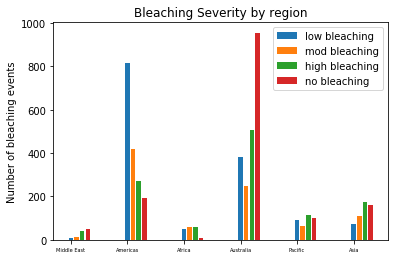

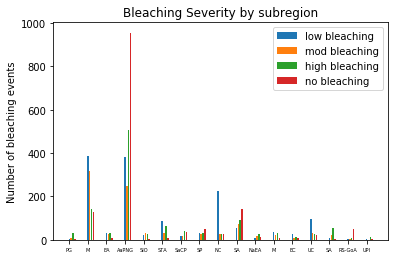

In [53]:
#bar plot of regions
#x values are not important, but are values that are spaced far enough apart to read tick mark labels
def barplot(value_list, bleaching_counts_list, heading):
    '''Makes a bar plot with the given heading'''
    x = list(range(1, len(value_list) * 10 + 1, 10))
    x_mod = list(range(2, len(value_list) * 10 + 2, 10))
    x_high = list(range(3, len(value_list) * 10 + 3, 10))
    x_no = list(range(4, len(value_list) * 10 + 4, 10))
    low = plt.bar(x, bleaching_counts_list[1], width = .8)
    mod = plt.bar(x_mod, bleaching_counts_list[2], width = .8)
    high = plt.bar(x_high, bleaching_counts_list[3], width = .8)
    none = plt.bar(x_no, bleaching_counts_list[0], width = .8)
    plt.xticks(x, value_list, fontsize = '5', fontstretch = '100')
    plt.legend((low[0], mod[0], high[0], none[0]), ('low bleaching', 'mod bleaching', 'high bleaching', 'no bleaching') , fontsize = '10')
    plt.ylabel('Number of bleaching events', fontsize = '10')
    plt.title('Bleaching Severity by ' + heading)
    
#bar plot by region
barplot(regions_list, regions_counts, 'region')
plt.show()

#bar plot by subregion
barplot(subregions_list_initials, subregions_counts, 'subregion')
plt.show()



In [88]:
#bleaching events over time

def bleaching_eachyear_dict(value_list, heading):
    '''Make a dictionary of dictionaries, where the outer dictionary has regions or subregions as keys,
    and the inner dictionaries are made up of years, where each year is a key, and the innermost dictionaries are the counts of each severity of bleaching'''
    bleaching_eachyear_dict = {}
    for value in value_list:
        dict_of_years = {}
        for row in bleaching_dict:
            if bleaching_dict[row][heading] == value:
                code = bleaching_dict[row]['severity_code']           
                year = bleaching_dict[row]['year']            
                if year in dict_of_years:
                    if code == '0':
                        previous_value = dict_of_years[year].get('none', 0)
                        dict_of_years[year]['none'] = previous_value + 1                
                    if code == '1': 
                        previous_value = dict_of_years[year].get('low', 0)
                        dict_of_years[year]['low'] = previous_value + 1                               
                    if code == '2':
                        previous_value = dict_of_years[year].get('mod', 0)
                        dict_of_years[year]['mod'] = previous_value + 1                                
                    if code == '3':
                        previous_value = dict_of_years[year].get('high',0)
                        dict_of_years[year]['high'] = previous_value + 1                
                else:
                    if code == '0':    
                        dict_of_years[year] = {}
                        dict_of_years[year]['none'] = 1
                    if code == '1':
                        dict_of_years[year] = {}
                        dict_of_years[year]['low'] = 1
                    if code == '2':
                        dict_of_years[year] = {}
                        dict_of_years[year]['mod'] = 1
                    if code == '3':
                        dict_of_years[year] = {}
                        dict_of_years[year]['high'] = 1
        bleaching_eachyear_dict[value] = dict_of_years
    return bleaching_eachyear_dict


regions_eachyear = bleaching_eachyear_dict(regions_list, 'region')
subregions_eachyear = bleaching_eachyear_dict(subregions_list, 'subregion')

for row in regions_eachyear:
    for year in regions_eachyear[row]: 
        count = regions_eachyear[row][year].get('low',0)
    
            

In [94]:
#Making an 'bleaching index' value for each year
#Bleaching index = the average of all of the bleaching severity values for that year for a particular region or subregion

def bleaching_index(dict_eachyear):
    '''Takes a dictionary of dictionaries as an input that has data for each year for regions or subregions,
    and outputs a dictionary of dictionaries with the bleaching index for each year for each place'''
    bleaching_index_dict = {}
    for row in dict_eachyear:
        dict_of_years = {}
        for year in dict_eachyear[row]:
            low_count = dict_eachyear[row][year].get('low', 0)
            mod_count = dict_eachyear[row][year].get('mod', 0)
            high_count = dict_eachyear[row][year].get('high', 0)
            none_count = dict_eachyear[row][year].get('none', 0)
            index = (low_count*1 + mod_count*2 + high_count*3 + none_count*0) / (low_count + mod_count + high_count + none_count)
            dict_of_years[year] = index
        bleaching_index_dict[row] = dict_of_years
    return bleaching_index_dict
    
    
regions_bleaching_index = bleaching_index(regions_eachyear)    
subregions_bleaching_index = bleaching_index(subregions_eachyear)    
print(regions_bleaching_index)

{'Australia': {'2003': 2.0, '2002': 1.1428571428571428, '2009': 0.42857142857142855, '1991': 2.0, '2006': 0.7368421052631579, '1996': 2.0, '1999': 1.0, '2000': 2.0, '1998': 1.2564308681672025, '1997': 2.0, '1994': 0.0, '2007': 0.4444444444444444, '2008': 0.0, '2005': 1.3636363636363635, '1992': 0.043478260869565216, '1987': 0.0}, 'Pacific': {'2003': 1.4, '2010': 0.2857142857142857, '2009': 1.542857142857143, '2006': 0.6, '1993': 3.0, '2002': 1.3404255319148937, '2007': 2.185185185185185, '2012': 0.0, '2005': 1.5, '2008': 0.375, '1987': 3.0, '1995': 1.0, '2011': 0.4444444444444444, '1991': 2.5, '2001': 1.3333333333333333, '1999': 2.0, '2000': 2.326923076923077, '1998': 1.5476190476190477, '1994': 2.0, '1996': 2.5, '2004': 1.5, '1986': 3.0, '1992': 3.0}, 'Asia': {'2003': 1.1428571428571428, '2010': 0.3037974683544304, '2009': 0.6190476190476191, '1990': 3.0, '2006': 3.0, '1993': 3.0, '1981': 1.0, '2002': 1.1153846153846154, '2007': 0.0, '2005': 2.0, '2008': 1.0, '1987': 3.0, '1995': 3.0,

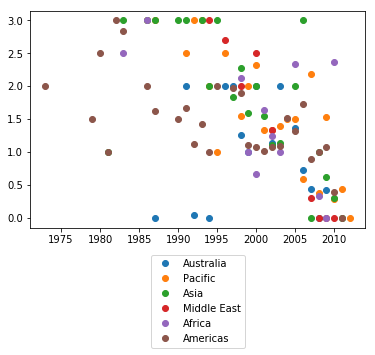

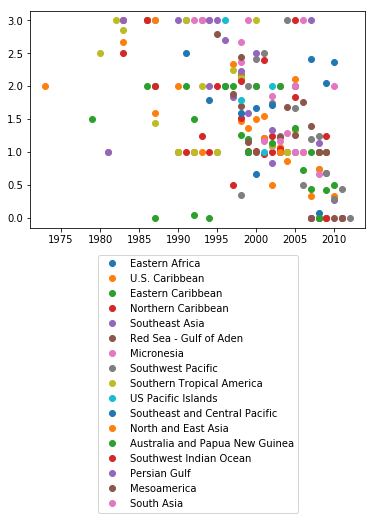

In [103]:
#plotting bleaching index over time for each region
def lineplots_bleachingindex(bleaching_index_dict):
    '''plot the bleaching index for each year for each region or subregion'''
    for value in bleaching_index_dict:
        year_list = []
        index_list = []
        for year in bleaching_index_dict[value]:
            year_list.append(year)
            index_list.append(bleaching_index_dict[value][year])
        plt.plot(year_list, index_list, 'o', label = value)
        plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))


lineplots_bleachingindex(regions_bleaching_index)    
plt.show()

lineplots_bleachingindex(subregions_bleaching_index)    
plt.show()